In [110]:
%pylab inline
import pandas as pd
import seaborn
import plotly.graph_objects as go
from datetime import datetime as dt
from sklearn.linear_model import LinearRegression    
import numpy as np   
import matplotlib.pyplot as plt  
from matplotlib import style
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [220]:
data = pd.read_csv('annual_beef_data.csv')

In [221]:
data.head()

,Year,Consumption,Production,Export,Population,Fuel_Price,Cattle Slaughtered,Beef_Price
0,1961,45340550.43,144539000,74700000,2828481,1.8,640100,40.35
1,1962,47745205.84,125689000,59800000,2835226,1.8,585600,41.56
2,1963,50934601.11,129513000,61700000,2847099,1.8,598900,42.80
3,1964,50009860.48,112798000,52700000,2860976,1.8,488500,44.09
4,1965,49876235.85,112943000,55000000,2874711,1.8,490700,45.41


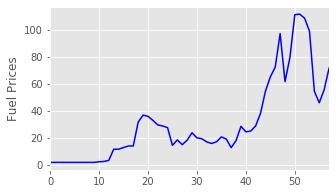

In [222]:
data= data[['Fuel_Price']]    
data= data.dropna()
data.Fuel_Price.plot(figsize=(5,3),color='blue')  
plt.ylabel("Fuel Prices")
plt.show() 


In [223]:
data["mov_avg_fuel"] = data["Fuel_Price"].rolling(window=5).mean()
data["mov_avg_fuel"].fillna(0,inplace = True)
data.head()

,Fuel_Price,mov_avg_fuel
0,1.8,0.0
1,1.8,0.0
2,1.8,0.0
3,1.8,0.0
4,1.8,1.8


In [224]:
# Predicting values for next 3 years
length=10
# makes 36 last values to Nan.
data["prediction_fuel"] = data["Fuel_Price"].shift(length)
data.head()

,Fuel_Price,mov_avg_fuel,prediction_fuel
0,1.8,0.0,NaN
1,1.8,0.0,NaN
2,1.8,0.0,NaN
3,1.8,0.0,NaN
4,1.8,1.8,NaN


In [225]:
y = np.array(data["prediction_fuel"])
# In prediction column it leaves the first 36 values and then fetches from the 11th
y = y[length:]
len(y)

48

In [226]:
x = np.array(data["Fuel_Price"])
#Get all of the x values except the last 36 rows
x = x[:-length]
len(x)

48

In [227]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
X_train = np.reshape(X_train,(X_train.shape[0],1))
X_test = np.reshape(X_test,(X_test.shape[0],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))
y_test = np.reshape(y_test,(y_test.shape[0],1))

In [228]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_confidence = lr.score(X_test,y_test)
lr_confidence

1.0

In [229]:
x_forecast = np.array(data["Fuel_Price"])[-3:]
x_forecast = np.reshape(x_forecast,(x_forecast.shape[0],1))
x_forecast.shape

(3, 1)

In [230]:
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([[46.  ],
       [55.71],
       [71.64]])

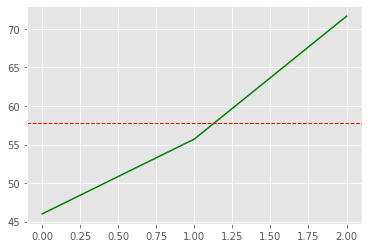

In [231]:
plt.plot(lr_prediction,label= "Linear Regression",color= "green")
plt.axhline(lr_prediction.mean(), color='red', linestyle='dashed', linewidth=1)

In [170]:
data = pd.read_csv('annual_beef_data.csv')

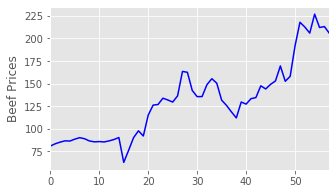

In [171]:
data= data[['Beef_Price']]    
data= data.dropna()
data.Beef_Price.plot(figsize=(5,3),color='blue')  
plt.ylabel("Beef Prices")
plt.show() 

In [172]:
data["mov_avg_beef"] = data["Beef_Price"].rolling(window=50).mean()
data["mov_avg_beef"].fillna(0,inplace = True)
data.head()

,Beef_Price,mov_avg_beef
0,80.93,0.0
1,83.46,0.0
2,85.27,0.0
3,86.72,0.0
4,86.48,0.0


In [173]:
# Predicting values for next 3 years
length=10
# makes 36 last values to Nan.
data["prediction_beef"] = data["Beef_Price"].shift(length)
data.head()

,Beef_Price,mov_avg_beef,prediction_beef
0,80.93,0.0,NaN
1,83.46,0.0,NaN
2,85.27,0.0,NaN
3,86.72,0.0,NaN
4,86.48,0.0,NaN


In [174]:
y = np.array(data["prediction_beef"])
# In prediction column it leaves the first 10 values and then fetches from the 11th
y = y[length:]
len(y)

48

In [175]:
x = np.array(data["Beef_Price"])
#Get all of the x values except the last 10 rows
x = x[:-length]
len(x)

48

In [176]:
# Split the data into 80% training and 20% testing
X_train1, X_test1, y_train1,y_test1 = train_test_split(x,y,test_size=0.2)
X_train1 = np.reshape(X_train1,(X_train1.shape[0],1))
X_test1 = np.reshape(X_test1,(X_test1.shape[0],1))
y_train1 = np.reshape(y_train1,(y_train1.shape[0],1))
y_test1 = np.reshape(y_test1,(y_test1.shape[0],1))

In [177]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr = LinearRegression()
lr.fit(X_train1,y_train1)
lr_confidence1 = lr.score(X_test1,y_test1)
lr_confidence1

1.0

In [178]:
x_forecast = np.array(data["Beef_Price"])[-36:]
x_forecast = np.reshape(x_forecast,(x_forecast.shape[0],1))
x_forecast.shape

(36, 1)

In [179]:
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([[126.94],
       [133.9 ],
       [131.97],
       [129.63],
       [136.49],
       [163.56],
       [162.59],
       [142.4 ],
       [135.64],
       [135.72],
       [148.95],
       [155.47],
       [150.56],
       [131.76],
       [125.88],
       [118.74],
       [112.09],
       [129.68],
       [127.37],
       [133.39],
       [134.62],
       [147.61],
       [144.13],
       [149.25],
       [153.05],
       [169.6 ],
       [152.64],
       [158.14],
       [191.99],
       [217.98],
       [212.68],
       [206.  ],
       [226.97],
       [212.18],
       [213.18],
       [205.81]])

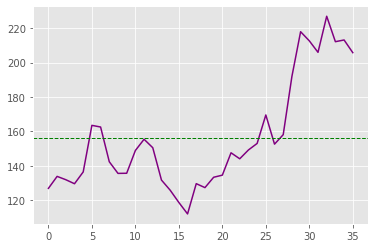

In [63]:
plt.plot(lr_prediction,label= "Linear Regression",color= "purple")
plt.axhline(lr_prediction.mean(), color='green', linestyle='dashed', linewidth=1)

In [42]:
data = pd.read_csv('annual_beef_data.csv')

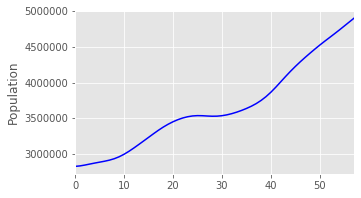

In [43]:
data= data[['Population']]    
data= data.dropna()
data.Population.plot(figsize=(5,3),color='blue')  
plt.ylabel("Population")
plt.show() 

In [44]:
data["mov_avg_Population"] = data["Population"].rolling(window=50).mean()
data["mov_avg_Population"].fillna(0,inplace = True)
data.head()

,Population,mov_avg_Population
0,2828481,0.0
1,2835226,0.0
2,2847099,0.0
3,2860976,0.0
4,2874711,0.0


In [45]:
# Predicting values for next 3 years
length=36
# makes 36 last values to Nan.
data["prediction_Population"] = data["Population"].shift(length)
data.head()

,Population,mov_avg_Population,prediction_Population
0,2828481,0.0,NaN
1,2835226,0.0,NaN
2,2847099,0.0,NaN
3,2860976,0.0,NaN
4,2874711,0.0,NaN


In [46]:
y = np.array(data["prediction_Population"])
# In prediction column it leaves the first 10 values and then fetches from the 11th
y = y[length:]
len(y)

22

In [47]:
x = np.array(data["Population"])
#Get all of the x values except the last 10 rows
x = x[:-length]
len(x)

22

In [48]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
X_train = np.reshape(X_train,(X_train.shape[0],1))
X_test = np.reshape(X_test,(X_test.shape[0],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))
y_test = np.reshape(y_test,(y_test.shape[0],1))

In [49]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_confidence = lr.score(X_test,y_test)
lr_confidence

1.0

In [50]:
x_forecast = np.array(data["Population"])[-36:]
x_forecast = np.reshape(x_forecast,(x_forecast.shape[0],1))
x_forecast.shape

(36, 1)

In [51]:
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([[3505714.],
       [3523059.],
       [3534103.],
       [3538519.],
       [3537244.],
       [3533181.],
       [3530188.],
       [3531219.],
       [3537626.],
       [3549302.],
       [3565952.],
       [3586685.],
       [3610958.],
       [3638457.],
       [3669860.],
       [3706687.],
       [3750945.],
       [3803780.],
       [3865820.],
       [3935781.],
       [4010506.],
       [4085676.],
       [4158042.],
       [4226428.],
       [4291258.],
       [4352866.],
       [4412181.],
       [4469900.],
       [4525802.],
       [4579498.],
       [4631391.],
       [4683914.],
       [4737093.],
       [4792230.],
       [4847362.],
       [4902493.]])

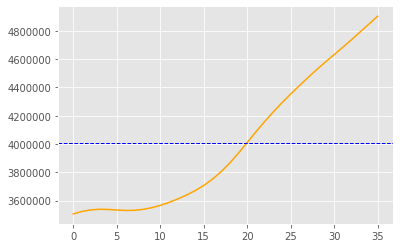

In [52]:
plt.plot(lr_prediction,label= "Linear Regression",color= "orange")
plt.axhline(lr_prediction.mean(), color='blue', linestyle='dashed', linewidth=1)